In [41]:
# import all the neccessary libraries 
import numpy as np
import pandas as pd
import scipy.stats as stats


#for vitualisation

import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df=pd.read_csv(r"C:\Users\busto\Downloads\Python Projects-20240123T103942Z-001\Python Projects\Stores.csv" ,encoding='utf-8')
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


## Data Inspection

In [43]:
# shape of data
df.shape

(896, 5)

In [44]:
df.dtypes

Store ID                int64
Store_Area              int64
Items_Available         int64
Daily_Customer_Count    int64
Store_Sales             int64
dtype: object

In [45]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [46]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


## Data Cleaning

In [47]:
#display all column names of DataFrame
print(df.columns.tolist())

['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']


## OBSERVATIONS AND VISUALIZATION

In [48]:
# Total Sales Valuation from all Supermarket Store Branches
sales_sum = df['Store_Sales'].sum()
new_sales = '${:,.0f}.M'.format(sales_sum)
new_sales

'$53,178,770.M'

In [52]:
# Rename 'Store ID' to 'Store_ID' for easy data exploration
df.rename(columns={'Store ID ': 'Store_ID'}, inplace=True)
df.columns

Index(['Store_ID', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [53]:
# Total Number of Supermarket Store Branches
stores = df['Store_ID'].count()
stores

896

In [54]:
# Total Number of items available in all Supermarket Store Branches
stores_items = df['Items_Available'].sum()
new_storesitems = '{:,.0f}'.format(stores_items)
new_storesitems

'1,596,704'

In [55]:
# Total Number of customers who visited stores on average over a month
customer_count = df['Daily_Customer_Count'].sum()
new_customercount = '{:,.0f}'.format(customer_count)
new_customercount

'704,570'

In [56]:
# Print Functions
print('The Total Sales Valuation of Supermarket Store Branches is: ', new_sales)
print('The Total No. of Supermarket Store Branches is: ', stores)
print('The Total No. of Items Available In Supermarket Store Branches is: ', new_storesitems)
print('The Total No. of customers who visited stores on average over a month: ', new_customercount)

The Total Sales Valuation of Supermarket Store Branches is:  $53,178,770.M
The Total No. of Supermarket Store Branches is:  896
The Total No. of Items Available In Supermarket Store Branches is:  1,596,704
The Total No. of customers who visited stores on average over a month:  704,570


In [57]:
# Bivariate
# The Top 10 Stores with the Most Items Sales
top10_stores = df.groupby('Store_ID')['Store_Sales'].sum().sort_values(ascending= False).head(10)
top10_stores

Store_ID
650    116320
869    105150
433    102920
409    102310
759    101820
558    101780
867    100900
167     99570
693     99480
872     98260
Name: Store_Sales, dtype: int64

Text(0.5, 1.0, 'Top 10 Stores With The Most Item Sales')

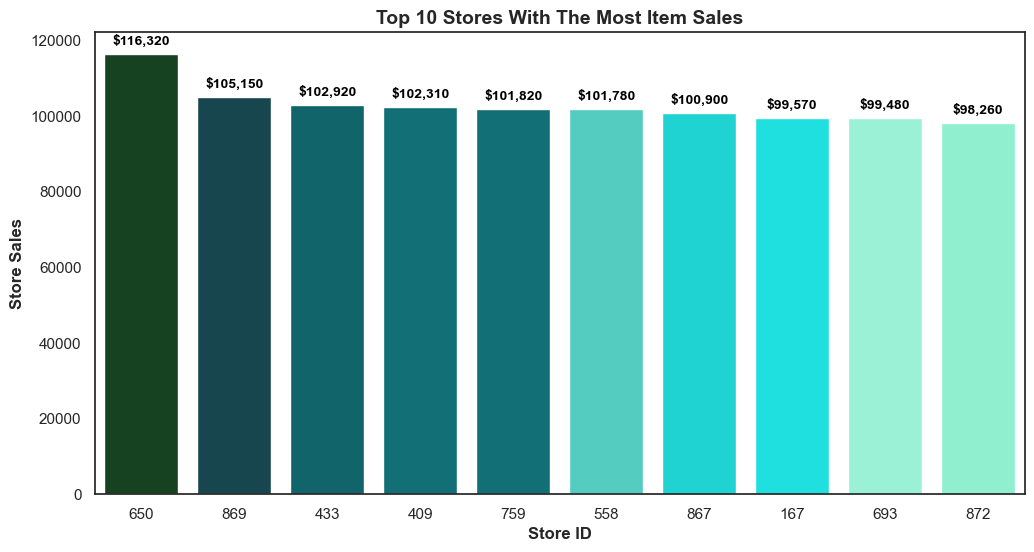

In [58]:
sns.set(style="white")  # Set the style for the plot

# Sort the DataFrame by 'Store_Sales' in descending order
top10_stores_sorted = top10_stores.sort_values(ascending=False)

custom_palette = sns.color_palette = ['#0F491F', '#0F4C57', '#017179', '#017E87', '#017E87', '#40E0D0', '#01F1F1', '#00FFFF', '#8CFFDB','#7FFFD4']
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=top10_stores.index, y=top10_stores.values, palette=custom_palette, order=top10_stores_sorted.index)

# Add labels for the values on top of the bars with a $ sign
for p in bar_plot.patches:
    bar_plot.annotate(f'${format(p.get_height(), ",.0f")}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points',
                      fontsize=10,
                      fontweight= 'bold',
                      color='black')

# Add labels and title
plt.xlabel('Store ID', fontsize= 12, fontweight= 'bold')
plt.ylabel('Store Sales', fontsize= 12, fontweight= 'bold')
plt.title('Top 10 Stores With The Most Item Sales', fontsize= 14, fontweight= 'bold')

# Show the plot

## OBSERVATION 

Top 10 Stores With Highest Item Sales: Leading Performers: The stores featured in the "Top 10 Stores With Highest Item Sales" are the top performers among all branches, determined by their sales figures. Store_ID 650 stands out at the top with sales totaling $116,320, showcasing either robust customer demand or successful sales tactics.

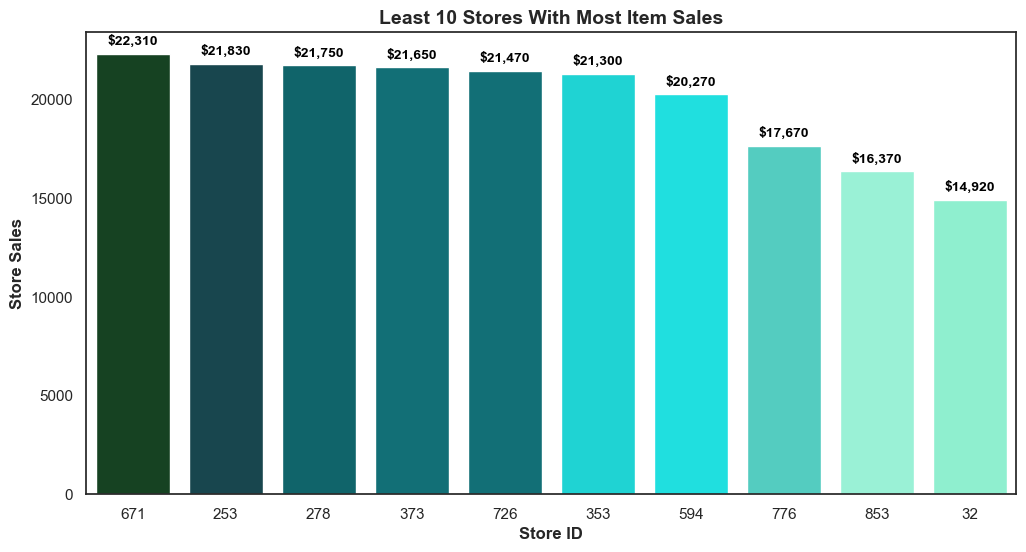

In [64]:
sns.set(style="white")  # Set the style for the plot

# Sort the DataFrame by 'Store_Sales' in descending order
least10_stores_sorted = least10_stores.sort_values(ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))

custom_palette = sns.color_palette = ['#0F491F', '#0F4C57', '#017179', '#017E87', '#017E87', '#01F1F1', '#00FFFF', '#40E0D0', '#8CFFDB','#7FFFD4']

bar_plot = sns.barplot(x=least10_stores_sorted.index, y=least10_stores_sorted.values, palette=custom_palette, order=least10_stores_sorted.index)

# Add labels for the values on top of the bars with a $ sign
for p in bar_plot.patches:
    bar_plot.annotate(f'${format(p.get_height(), ",.0f")}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points',
                      fontsize=10,
                      fontweight='bold',
                      color='black')

# Add labels and title
plt.xlabel('Store ID', fontsize=12, fontweight='bold')
plt.ylabel('Store Sales', fontsize=12, fontweight='bold')
plt.title('Least 10 Stores With Most Item Sales', fontsize=14, fontweight='bold')

# Show the plot
plt.show()

## Least 10 Stores With Most Item Sales:
Bottom 10 Stores With Highest Item Sales" show reduced sales figures, with Store_ID 671 recording the lowest sales amounting to $22,310. These establishments could be encountering obstacles that are affecting their sales outcomes.

In [65]:
# Bivariate
# The Least 10 Stores with the Most Items Sales
least10_stores = df.groupby('Store_ID')['Store_Sales'].sum().sort_values(ascending= False).tail(10)
least10_stores

Store_ID
671    22310
253    21830
278    21750
373    21650
726    21470
353    21300
594    20270
776    17670
853    16370
32     14920
Name: Store_Sales, dtype: int64

In [66]:
# Multivariate
# The Top 10 Stores with the Most Items Sales By Store Area and Dily Customer Count
top10_stores = df.groupby(['Store_ID', 'Store_Area', 'Daily_Customer_Count'])['Store_Sales'].sum().sort_values(ascending= False).head(10)
top10_stores

Store_ID  Store_Area  Daily_Customer_Count
650       1989        860                     116320
869       1775        980                     105150
433       1365        680                     102920
409       1303        1310                    102310
759       1486        820                     101820
558       1137        700                     101780
867       1565        900                     100900
167       1465        680                      99570
693       1548        480                      99480
872       1800        1100                     98260
Name: Store_Sales, dtype: int64

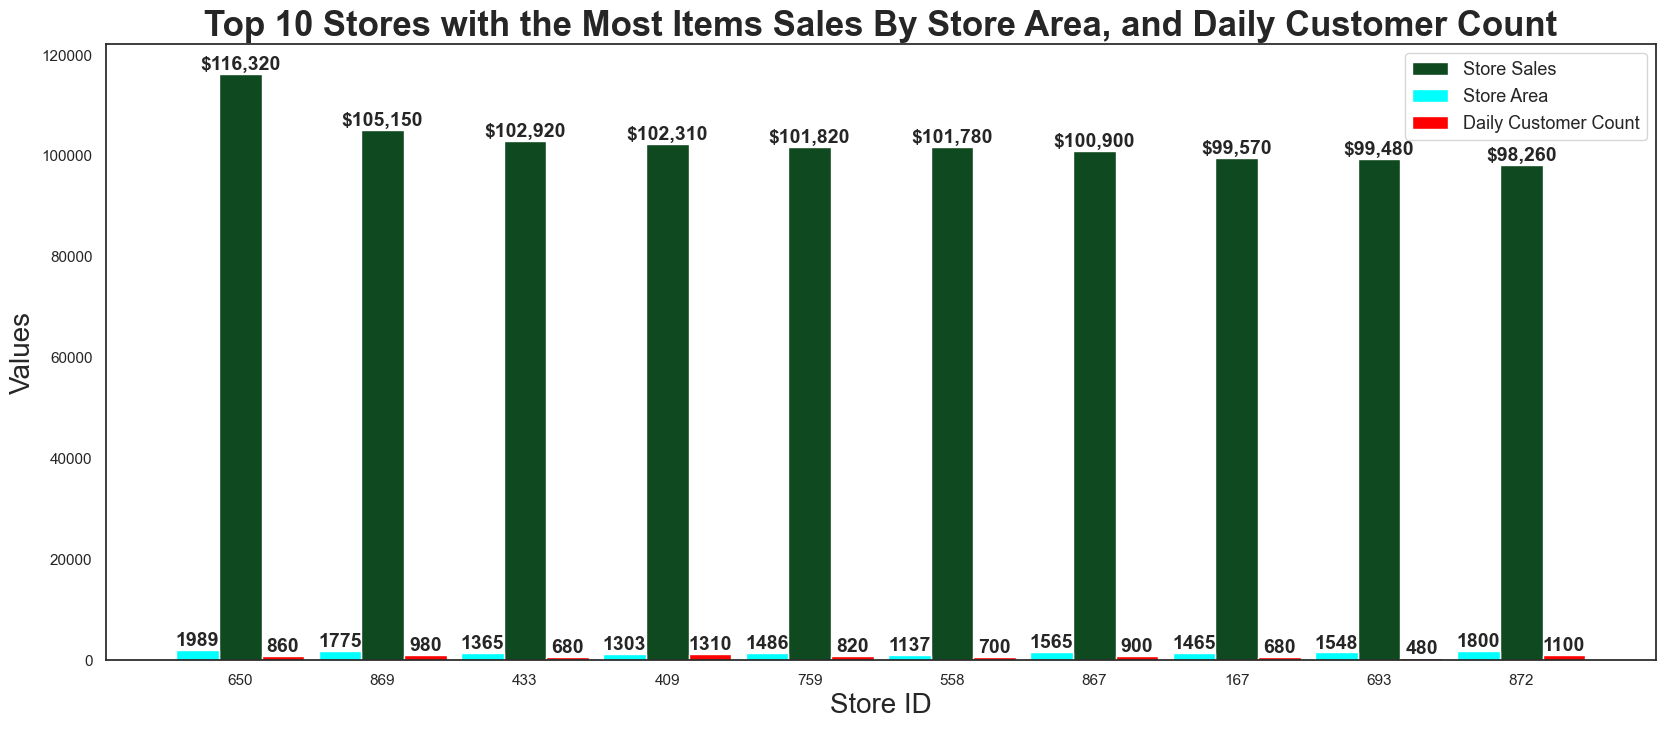

In [67]:
# Create a grouped bar plot for The Top 10 Stores with the Most Items Sales By Store Area and Daily Customer Count

# Extract necessary data for plotting
store_ids = top10_stores.index.get_level_values('Store_ID')
store_area = top10_stores.index.get_level_values('Store_Area')
daily_customer_counts = top10_stores.index.get_level_values('Daily_Customer_Count')
store_sales = top10_stores.values

# Set the figure size
plt.figure(figsize=(20, 8))  # Increase the figure size

# Increase the height of bars 2 and 3 by multiplying their values
height_factor_bars1 = 10  # You can adjust this factor
height_factor_bars3 = 10  # You can adjust this factor

# Plot grouped bar chart
bar_width = 0.30  # Increased width of each bar
index = range(len(store_ids))

bars2 = plt.bar([i + bar_width for i in index], store_sales, width=bar_width, color='#0F491F', label='Store Sales')
bars1 = plt.bar(index, store_area, width=bar_width, color='#00FFFF', label='Store Area')
bars3 = plt.bar([i + 2 * bar_width for i in index], daily_customer_counts, width=bar_width, color='red', label='Daily Customer Count')

# Set x-axis ticks and labels
plt.xticks([i + bar_width for i in index], store_ids)

# Add value labels on top of the bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        if bars == bars2:  # Check if it's the 'Store Sales' bar
            plt.text(bar.get_x() + bar.get_width() / 2, yval, f'${yval:,.0f}', ha='center', va='bottom', fontsize=14, fontweight='bold')
        else:
            plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=14, fontweight='bold')

# Add labels and title
plt.xlabel('Store ID', fontsize=20)  # Increase the font size for x-axis label
plt.ylabel('Values', fontsize=20)  # Increase the font size for y-axis label
plt.title('Top 10 Stores with the Most Items Sales By Store Area, and Daily Customer Count', fontsize=25, fontweight='bold')  # Increase the font size for title

# Add legend
plt.legend(fontsize=13)  # Increase the font size for legend

# Show the plot
plt.show()

## OBSERVATION
Top 10 Stores with the Highest Item Sales Based on Store Area and Daily Customer Count:

Store_ID 650: Leading the pack with Store_Sales reaching 116,320, a Store_Area of 1989, and a Daily_Customer_Count of 860, this store exemplifies its success in not only drawing in customers but also generating substantial sales.

In [68]:
# Multivariate
# The Top 10 Stores with the Most Daily Customer Count By Store Store Area and Store Sales
top10_daily_cust_count = df.groupby(['Store_ID', 'Store_Area' , 'Store_Sales'])['Daily_Customer_Count'].sum().sort_values(ascending= False).head(10)
top10_daily_cust_count

Store_ID  Store_Area  Store_Sales
849       919         73810          1560
350       1886        40350          1530
536       1057        35420          1490
95        1921        77120          1470
313       1494        43640          1450
17        1578        77250          1440
335       1624        44660          1440
232       1397        49160          1410
84        1572        42670          1410
649       1514        54820          1400
Name: Daily_Customer_Count, dtype: int64

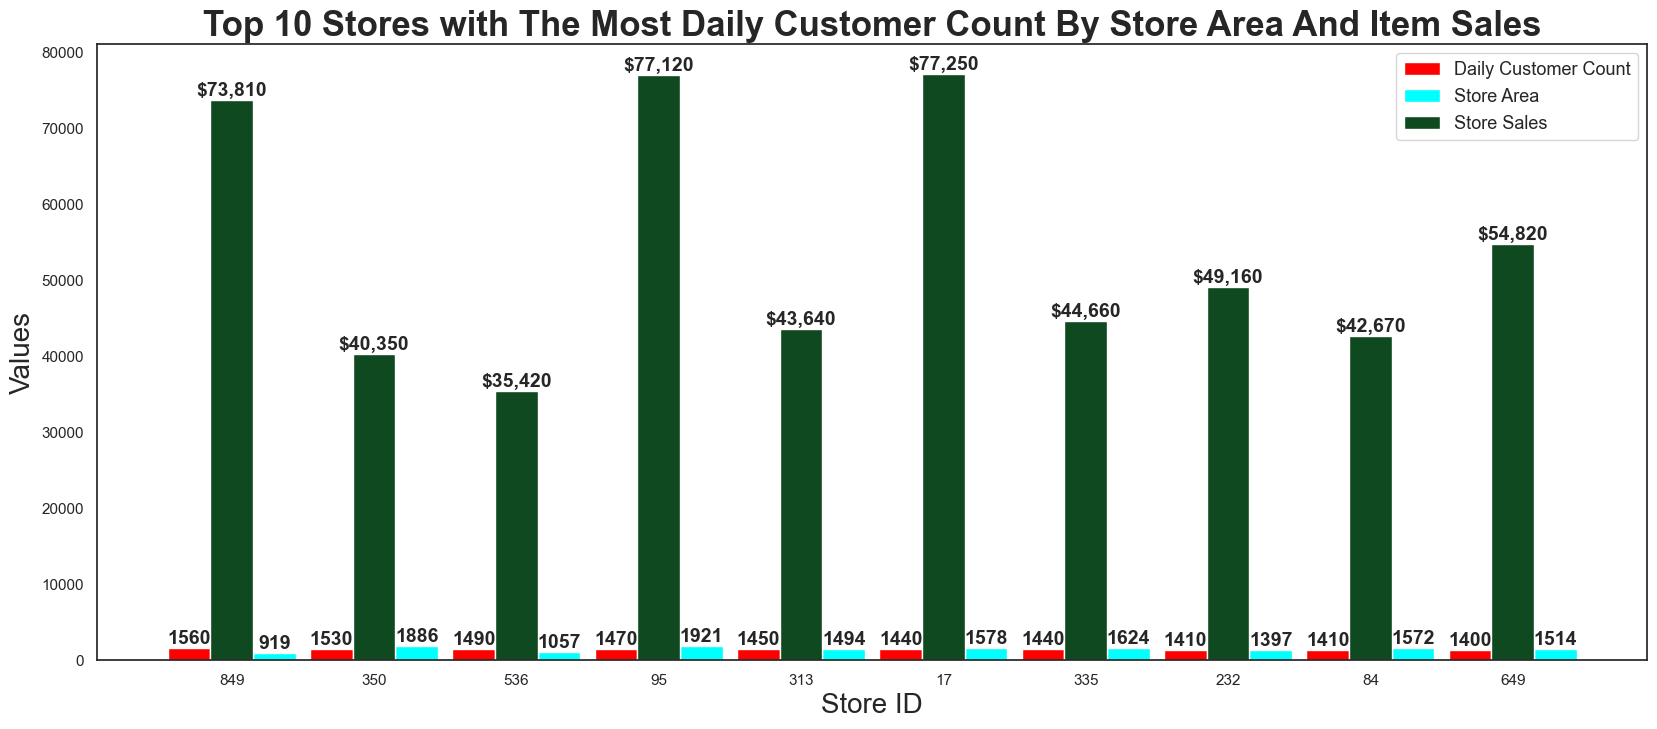

In [69]:
# Create a grouped bar plot for The Top 10 Stores with the Most Daily Customer Count By Store Store Area and Store Sales

# Extract necessary data for plotting
store_ids = top10_daily_cust_count.index.get_level_values('Store_ID')
store_area = top10_daily_cust_count.index.get_level_values('Store_Area')
store_sales = top10_daily_cust_count.index.get_level_values('Store_Sales')
daily_customer_count = top10_daily_cust_count.values

# Set the figure size
plt.figure(figsize=(20, 8))  # Increase the figure size

# Increase the height of bars 2 and 3 by multiplying their values
height_factor_bars1 = 10  # You can adjust this factor
height_factor_bars3 = 10  # You can adjust this factor

# Plot grouped bar chart
bar_width = 0.30  # Increased width of each bar
index = range(len(store_ids))



bars1 = plt.bar(index, daily_customer_count, width=bar_width, color='red', label='Daily Customer Count')
bars2 = plt.bar([i + 2 * bar_width for i in index], store_area, width=bar_width, color='#00FFFF', label='Store Area')
bars3 = plt.bar([i + bar_width for i in index],store_sales , width=bar_width, color='#0F491F', label='Store Sales')

# Set x-axis ticks and labels
plt.xticks([i + bar_width for i in index], store_ids)

# Add value labels on top of the bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        if bars == bars3:  # Check if it's the 'Store Sales' bar
            plt.text(bar.get_x() + bar.get_width() / 2, yval, f'${yval:,.0f}', ha='center', va='bottom', fontsize=14, fontweight='bold')
        else:
            plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=14, fontweight='bold')

# Add labels and title
plt.xlabel('Store ID', fontsize=20)  # Increase the font size for x-axis label
plt.ylabel('Values', fontsize=20)  # Increase the font size for y-axis label
plt.title('Top 10 Stores with The Most Daily Customer Count By Store Area And Item Sales', fontsize=25, fontweight='bold')  # Increase the font size for title

# Add legend
plt.legend(fontsize=13)  # Increase the font size for legend

# Show the plot
plt.show()


## OBSERVATION
Top 10 Stores with the Highest Daily Customer Count Based on Store Area and Item Sales:

Store_ID 849: Standing out with a Store_Area of 919, this store tops the list with a remarkable daily customer count of 1560 and notable Store_Sales amounting to 73,810. Its success underscores effective approaches in engaging customers and driving sales.

In [70]:
# Bivariate
# The least 10 Stores with the Most Daily Customer Count By Store Store Area and Store Sales
least10_daily_cust_count = df.groupby(['Store_ID', 'Store_Area' , 'Store_Sales'])['Daily_Customer_Count'].sum().sort_values(ascending= False).tail(10)
least10_daily_cust_count

Store_ID  Store_Area  Store_Sales
539       1622        64780          210
2         1461        39820          210
711       1502        55980          190
827       1609        37920          160
888       1156        92370          140
147       1442        58920          130
231       1347        72350          120
877       1259        88270          100
152       1662        63730           70
40        1270        45480           10
Name: Daily_Customer_Count, dtype: int64

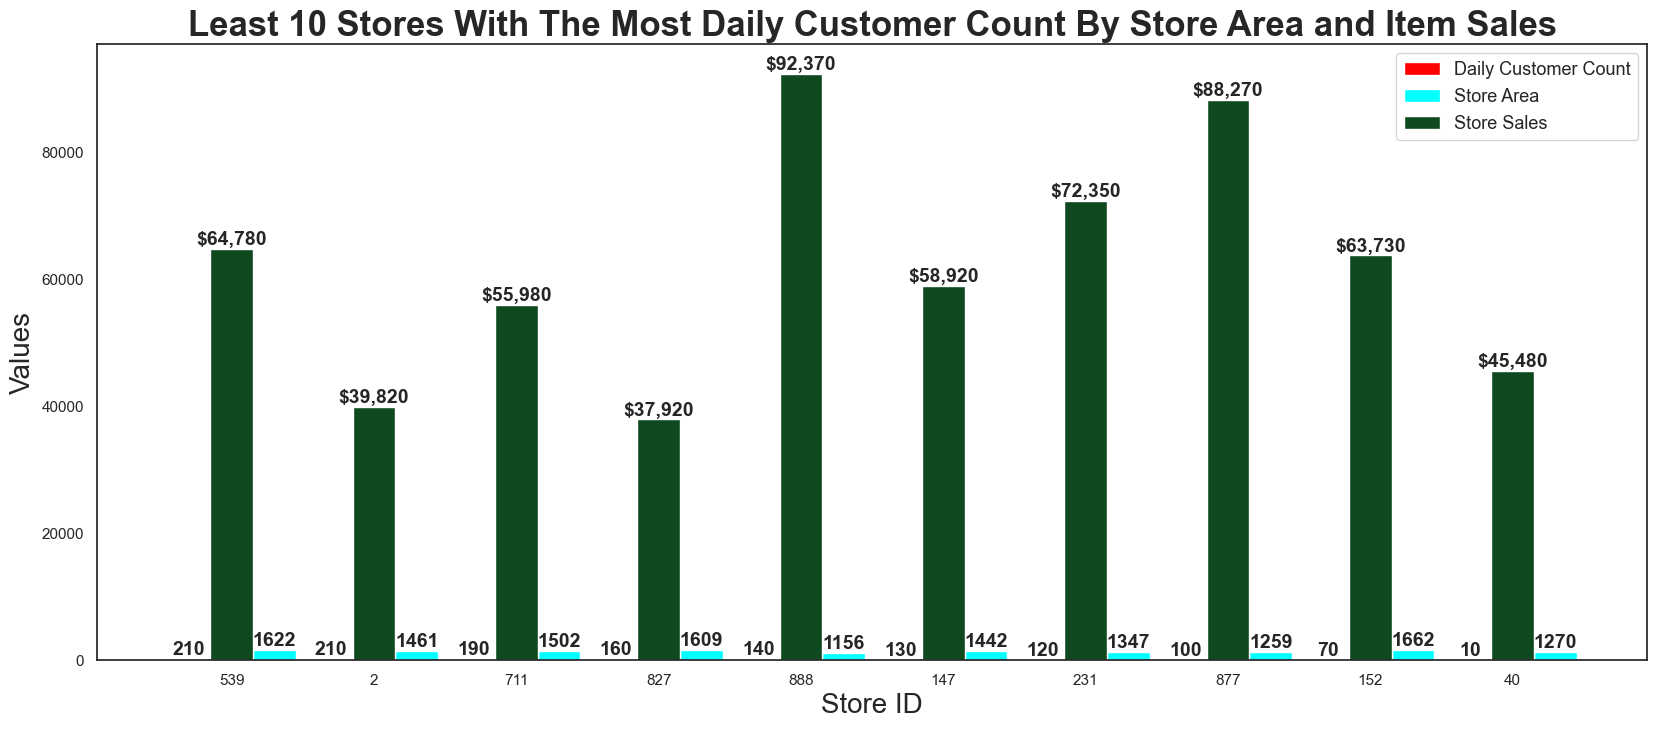

In [71]:
# Create a grouped bar plot for The Least 10 Stores with the Most Daily Customer Count By Store Store Area and Store Sales


# Extract necessary data for plotting
store_ids = least10_daily_cust_count.index.get_level_values('Store_ID')
store_area = least10_daily_cust_count.index.get_level_values('Store_Area')
store_sales = least10_daily_cust_count.index.get_level_values('Store_Sales')
daily_customer_count = least10_daily_cust_count.values

# Set the figure size
plt.figure(figsize=(20, 8))  # Increase the figure size

# Increase the height of bars 2 and 3 by multiplying their values
height_factor_bars1 = 10  # You can adjust this factor
height_factor_bars3 = 10  # You can adjust this factor

# Plot grouped bar chart
bar_width = 0.30  # Increased width of each bar
index = range(len(store_ids))



bars1 = plt.bar(index, daily_customer_count, width=bar_width, color='red', label='Daily Customer Count')
bars2 = plt.bar([i + 2 * bar_width for i in index], store_area, width=bar_width, color='#00FFFF', label='Store Area')
bars3 = plt.bar([i + bar_width for i in index],store_sales , width=bar_width, color='#0F491F', label='Store Sales')

# Set x-axis ticks and labels
plt.xticks([i + bar_width for i in index], store_ids)

# Add value labels on top of the bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        if bars == bars3:  # Check if it's the 'Store Sales' bar
            plt.text(bar.get_x() + bar.get_width() / 2, yval, f'${yval:,.0f}', ha='center', va='bottom', fontsize=14, fontweight='bold')
        else:
            plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=14, fontweight='bold')

# Add labels and title
plt.xlabel('Store ID', fontsize=20)  # Increase the font size for x-axis label
plt.ylabel('Values', fontsize=20)  # Increase the font size for y-axis label
plt.title('Least 10 Stores With The Most Daily Customer Count By Store Area and Item Sales', fontsize=25, fontweight='bold')  # Increase the font size for title

# Add legend
plt.legend(fontsize=13)  # Increase the font size for legend

# Show the plot
plt.show()


## OBSERVATION
Least 10 Stores With The Most Daily Customer Count By Store Area and Item Sales:

Store_ID 40: Encountering notable hurdles, this store reports a Daily_Customer_Count of merely 10, the lowest among the stores listed. Although boasting a Store_Area of 1270, its sales performance remains constrained, indicating room for potential enhancements.